# **Tarea 7 : Clustering**

* Shu-yi Wong Baxter
* Sebastian Perez Berrios
* Mathias Cáceres Bustamante

In [4]:
import csv
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import cluster
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage  
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/My Drive/Mineria de datos(Modelo)'

Mounted at /content/drive/


In [5]:
datos=pd.read_csv("/content/drive/My Drive/Mineria de datos(Modelo)/avance 5.5.csv", sep=';')

In [7]:
#Elimina los nulos de date que son pocos y eso hace que se eliminen los nulos pequeños que
# estan en la misma fila y quedan las columnas que se usaran sin nulos
datos.drop(datos[datos.date.isnull()].index, inplace = True) #Ojo aqui, el inplace true los elimina del dataset original, no hace una copia

In [8]:
#Crea la columna heridos que es el target, junta los valores de n_killed y n_injured
datos.loc[(datos.n_killed==0.0)&(datos.n_injured==0.0) ,'heridos']=0;
datos.loc[(datos.n_killed>=1.0)&(datos.n_injured==0.0) ,'heridos']=1;
datos.loc[(datos.n_killed==0.0)&(datos.n_injured>=1.0) ,'heridos']=1;
datos.loc[(datos.n_killed>=1.0)&(datos.n_injured>=1.0) ,'heridos']=1;

In [9]:
datos.loc[(datos.state==7.0)|(datos.state==9.0)|(datos.state==12.0)|(datos.state==15.0)|(datos.state==18.0)|(datos.state==23.0)|(datos.state==24.0)|(datos.state==25.0)|(datos.state==33.0)|(datos.state==35.0)|(datos.state==41.0)|(datos.state==45.0)|(datos.state==47.0),'state2']=0;
datos.loc[(datos.state==3.0)|(datos.state==8.0)|(datos.state==16.0)|(datos.state==20.0)|(datos.state==26.0)|(datos.state==27.0)|(datos.state==31.0)|(datos.state==32.0)|(datos.state==39.0)|(datos.state==44.0)|(datos.state==50.0),'state2']=1;
datos.loc[(datos.state==0.0)|(datos.state==1.0)|(datos.state==4.0)|(datos.state==6.0)|(datos.state==10.0)|(datos.state==11.0)|(datos.state==13.0)|(datos.state==14.0)|(datos.state==17.0)|(datos.state==19.0)|(datos.state==21.0)|(datos.state==22.0)|(datos.state==28.0)|(datos.state==29.0)|(datos.state==34.0)|(datos.state==37.0)|(datos.state==38.0)|(datos.state==40.0)|(datos.state==42.0)|(datos.state==46.0)|(datos.state==48.0)|(datos.state==49.0),'state2']=2;
datos.loc[(datos.state==2.0)|(datos.state==5.0)|(datos.state==30.0)|(datos.state==36.0)|(datos.state==43.0) ,'state2']=3;

In [30]:
datos2 = datos.drop_duplicates()
datos2 = datos.drop(['incident_id','date','address','incident_characteristics','location_description','latitude','longitude','notes','city_or_county','congressional_district','n_killed','n_injured','state'], axis=1) #Eliminar columnas correlacionales a global_sales
datos2.loc[(datos2.avg_age>=0.0)&(datos2.avg_age<18.0) ,'avg_age']=0;
datos2.loc[(datos2.avg_age>=18.0)&(datos2.avg_age<25.0) ,'avg_age']=1;
datos2.loc[(datos2.avg_age>=25.0)&(datos2.avg_age<45.0) ,'avg_age']=2;
datos2.loc[(datos2.avg_age>=45.0)&(datos2.avg_age<70.0) ,'avg_age']=3;
datos2.loc[(datos2.avg_age>=70.0) ,'avg_age']=4;
datos2.drop(datos2[datos2.avg_age.isnull()].index, inplace = True)

In [12]:
datos3=datos2.copy()
datos3 = datos3.drop(['heridos'], axis=1) #Eliminar columnas correlacionales a global_sales
variables_independientes = datos3

In [13]:
datos4=datos2.copy()
datos4 = datos4.drop(['month','day','state2','gun_stolen','gun_type','n_guns_involved','participant_age_group','participant_gender','avg_age'], axis=1) #Eliminar columnas correlacionales a global_sales
variables_objetivo = datos4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  """
/usr/local/lib/python3.7/d

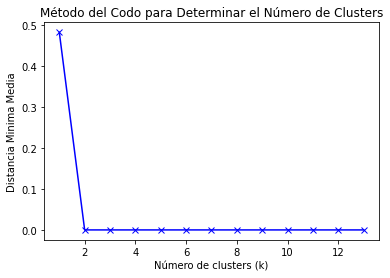

In [14]:
##Para los muertos
distortions = []
K = range(1,14)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k).fit(datos4[['heridos']])
    kmeanModel.fit(datos4[['heridos']])
    distortions.append(sum(np.min(cdist(datos4[['heridos']], kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / datos4[['heridos']].shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distancia Minima Media')
plt.title('Método del Codo para Determinar el Número de Clusters')
plt.show()

**KMEANS PARA 3 GRUPOS**

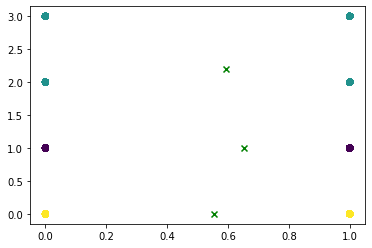

In [15]:
kmeans = cluster.KMeans(3)
kmeans.fit(datos2[['heridos', 'state2']])
labels = kmeans.labels_
centroids3 = kmeans.cluster_centers_
plt.scatter( datos2['heridos'],datos2['state2'], c=labels)
plt.scatter(centroids3[:,0], centroids3[:,1], marker='x', c='green')
plt.show()

In [16]:
# Valores de los centroides
centroids3

array([[6.52889772e-01, 1.00000000e+00],
       [5.92854958e-01, 2.19853859e+00],
       [5.52915830e-01, 6.68354261e-13]])

**KMEANS PARA 4 GRUPOS**

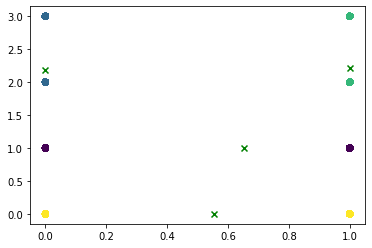

In [17]:
kmeans = cluster.KMeans(4)
kmeans.fit(datos2[[ 'heridos','state2']])
labels = kmeans.labels_
centroids4 = kmeans.cluster_centers_
plt.scatter( datos2['heridos'],datos2['state2'], c=labels)
plt.scatter(centroids4[:,0], centroids4[:,1], marker='x', c='green')
plt.show()

In [18]:
# Valores de los centroides
centroids4

array([[6.52889772e-01, 1.00000000e+00],
       [5.03708186e-13, 2.17912539e+00],
       [1.00000000e+00, 2.21187067e+00],
       [5.52915830e-01, 6.68354261e-13]])

**KMEANS PARA 5 GRUPOS**

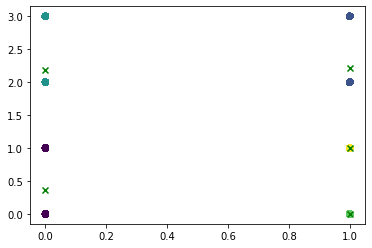

In [19]:
kmeans = cluster.KMeans(5)
kmeans.fit(datos2[['heridos', 'state2']])
labels = kmeans.labels_
centroids5 = kmeans.cluster_centers_
plt.scatter(datos2['heridos'], datos2['state2'], c=labels)
plt.scatter(centroids5[:,0], centroids5[:,1], marker='x', c='green')
plt.show()

In [20]:
# Valores de los centroides
centroids5

array([[ 4.97268893e-13,  3.64240757e-01],
       [ 1.00000000e+00,  2.21187067e+00],
       [ 5.03708186e-13,  2.17912539e+00],
       [ 1.00000000e+00, -4.61630734e-13],
       [ 1.00000000e+00,  1.00000000e+00]])

**KMEANS PARA 6 GRUPOS**

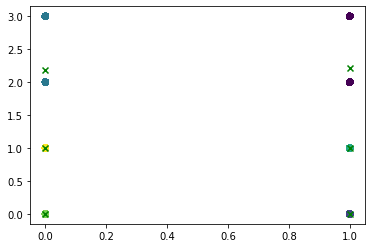

In [21]:
kmeans = cluster.KMeans(6)
kmeans.fit(datos2[['heridos','state2']])
labels = kmeans.labels_
centroids6 = kmeans.cluster_centers_
plt.scatter(datos2['heridos'],datos2['state2'], c=labels)
plt.scatter(centroids6[:,0], centroids6[:,1], marker='x', c='green')
plt.show()

In [22]:
# Valores de los centroides
centroids6

array([[ 1.00000000e+00,  2.21187067e+00],
       [ 1.00000000e+00, -4.61630734e-13],
       [ 5.03708186e-13,  2.17912539e+00],
       [ 1.00000000e+00,  1.00000000e+00],
       [ 3.55160346e-13, -9.76996262e-15],
       [ 6.42819131e-14,  1.00000000e+00]])

In [23]:
from scipy.spatial.distance import pdist, squareform

In [31]:
clustdf_t=datos2.transpose()
c_dist = pdist(clustdf_t) # computing the distance
c_link = linkage(clustdf_t,  metric='correlation', method='complete')# computing the linkage

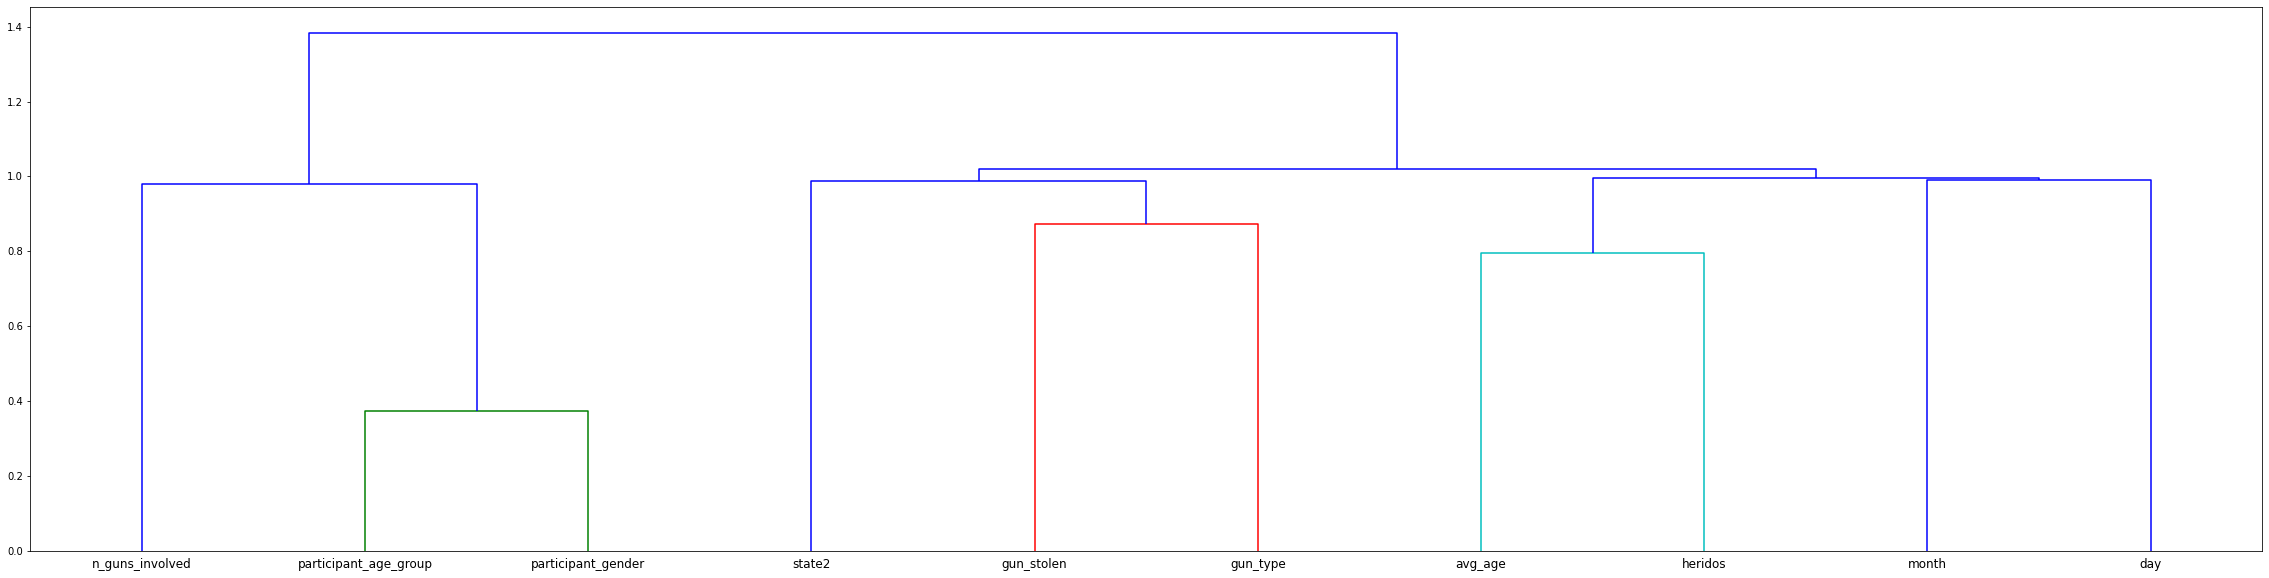

In [32]:
plt.figure(figsize=(40, 10))
dendrogram(c_link,labels=list(datos2.columns))
plt.show()